In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 图像傅里叶变换

In [71]:
img_gray = cv2.imread('lena_Gray.tif',0) #读取灰度图像
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f) #转化成直流量


(<matplotlib.axes._subplots.AxesSubplot at 0x179931f5f28>,
 Text(0.5, 1.0, 'center'))

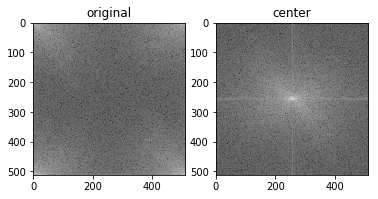

In [72]:
s1 = np.log(np.abs(f)) #将复数转化成实数，取对数将数据变化到较小的范围（比如0-255）
s2 = np.log(np.abs(fshift))
# 显示的是幅度谱，并没有相位信息
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')

(<matplotlib.axes._subplots.AxesSubplot at 0x179907df2e8>,
 Text(0.5, 1.0, 'center'))

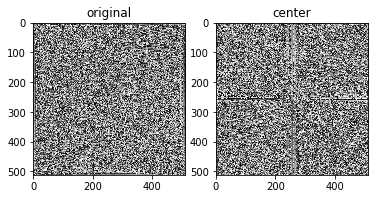

In [74]:
# angle()函数获取相位信息
ph_f = np.angle(f)
ph_fshift = np.angle(fshift)

plt.subplot(121),plt.imshow(ph_f,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(ph_fshift,'gray'),plt.title('center')

## 图像傅里叶逆变换

(<matplotlib.image.AxesImage at 0x17993f39390>, Text(0.5, 1.0, 'img_ifft'))

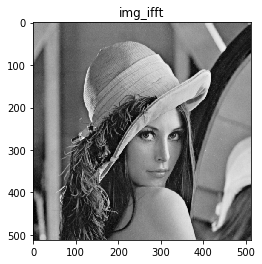

In [75]:
# 逆变换
f1shift = np.fft.ifftshift(fshift)
img_ifft = np.fft.ifft2(f1shift)
#逆变换后是复数，无法显示
img_ifft = np.abs(img_ifft) #取绝对值转换成实数
plt.imshow(img_back,'gray'),plt.title('img_ifft')

## 滤波–低通滤波器，高通滤波器，带通带阻滤波器。

### 理想高通滤波器

In [78]:
img_gray = cv2.imread('lena_Gray.tif',0) #读取灰度图像
rows,cols = img_gray.shape #获取图像高和宽

# 傅里叶变换到频域
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f) #转化成直流量，将低频部分移到中间

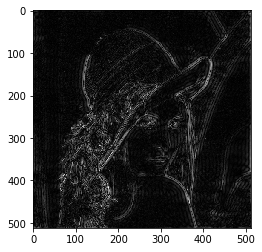

In [79]:
# 生成高通滤波器算子
mask = np.ones(img_gray.shape,np.uint8) #生成一个全为1的mask
mask[int(rows/2-30): int(rows/2+30), int(cols/2-30): int(cols/2+30)] = 0 #将中心宽为60的正方形区域置为0，其他部分为1，形成一个高通滤波器

#对频域图像的进行傅里叶逆变换
fshift_new = fshift*mask #将频域图像与算子相乘，滤除低频部分
f2shift = np.fft.ifftshift(fshift_new) #傅里叶反变换
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new) #取绝对值，用以显示图象
plt.imshow(img_new, 'gray')

### 理想低通滤波器

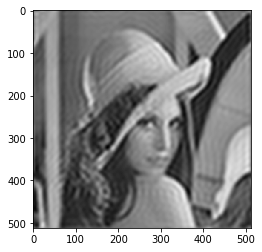

In [80]:
# 生成高通滤波器算子
mask = np.zeros(img_gray.shape,np.uint8) #生成一个全为0的mask
mask[int(rows/2-30): int(rows/2+30), int(cols/2-30): int(cols/2+30)] = 1 #将中心宽为60的正方形区域置为1，其他部分为0，形成一个低通滤波器

#对频域图像的进行傅里叶逆变换
fshift_new = fshift*mask #将频域图像与算子相乘，滤除高频部分
f2shift = np.fft.ifftshift(fshift_new) #傅里叶反变换
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new) #取绝对值，用以显示图象
plt.imshow(img_new, 'gray')

### 理想带通滤波器

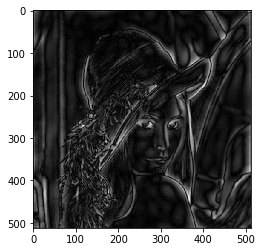

In [81]:
# 生成高通滤波器算子
mask1 = np.ones(img_gray.shape,np.uint8)
mask1[int(rows/2-8): int(rows/2+8), int(cols/2-8): int(cols/2+8)] = 0 #定义一个高通滤波器
mask2 = np.zeros(img_gray.shape,np.uint8)
mask2[int(rows/2-80): int(rows/2+80), int(cols/2-80): int(cols/2+80)] = 1 #定义一个低通滤波器
mask = mask1*mask2 #将两个滤波器相乘，形成带通滤波器

#对频域图像的进行傅里叶逆变换
fshift_new = fshift*mask #将频域图像与算子相乘，滤除通频带意外的部分
f2shift = np.fft.ifftshift(fshift_new) #傅里叶反变换
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new) #取绝对值，用以显示图象
plt.imshow(img_new, 'gray')